Word2Vec 는 문장의 단어를 벡터로 변화하는 도구 입니다.

Gensim 은 Werd2Vec를 구현한 파이썬 라이브러리입니다.

pip install gensim


Corpuㄴ 도 필요합니다.

위키피디아, 국립국어원 데이터에 공개되어 있는 텍스트 데이터를 많이 활용합니다.

다음 URL 에 있는 것들도 참고해보세요.

http://konlpy.org/ko/latest/references/#corpora



### Gensim 의 Word2Vec 으로 토지를 읽어보기

In [2]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Twitter
from gensim.models import word2vec

필요한 whl 파일을 다운 받고 직접 인스톨 했다.

 python -m pip install whl파일명

In [3]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Twitter
from gensim.models import word2vec

In [10]:
import os

dirname = '../data/text/토지'
files = os.listdir(dirname)

text = ""
for filename in files:
    if filename.startswith('토지'):
        fullname = os.path.join(dirname, filename)
        fp = codecs.open(fullname, 'r', encoding='cp949', errors='ignore')
        text += fp.read()
print(len(text))        

5382203


In [16]:

twitter = Twitter()
results = []
lines = text.split('\n')
for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r = []
    for word in malist:
        if not word[1] in ['Josa', 'Eomi', 'Punctuation']:
            r.append(word[0])
    rl = (' '.join(r)).strip()
    results.append(rl)

wakati_file = 'toji.wakati'
with open(wakati_file, 'w', encoding='utf-8') as fp:
    fp.write('\n'.join(results))
    
data = word2vec.LineSentence(wakati_file)
model = word2vec.Word2Vec(data, size=100, window=10, hs=1, min_count=2, sg=1)
model.save('toji.model')
print('ok')
    

        

ok


In [17]:
model = word2vec.Word2Vec.load('toji.model')
model.most_similar(positive=['땅'])

[('나랏님', 0.8457980155944824),
 ('우중', 0.8009925484657288),
 ('쿠로', 0.7982668876647949),
 ('치우다', 0.7978565096855164),
 ('메', 0.7939143776893616),
 ('한산', 0.7927104234695435),
 ('참외', 0.7912659645080566),
 ('팔월', 0.7894967198371887),
 ('사시', 0.7889599800109863),
 ('망치다', 0.7889475226402283)]

In [18]:
model.most_similar(positive=['집'])

[('남정', 0.8413645029067993),
 ('돌아가다', 0.8047130107879639),
 ('저녁', 0.7917232513427734),
 ('메밀가루', 0.7810057401657104),
 ('며칠', 0.7809655666351318),
 ('구석', 0.7776042222976685),
 ('참견', 0.7775806784629822),
 ('기름', 0.7736319303512573),
 ('돼지', 0.7714501619338989),
 ('팽이', 0.7685133814811707)]

In [29]:
data = model.most_similar(positive=['술'])
data

[('한잔', 0.8274869322776794),
 ('들르다', 0.7834863066673279),
 ('손해', 0.7814699411392212),
 ('틀다', 0.7772457599639893),
 ('자아', 0.7732805013656616),
 ('주모', 0.7693314552307129),
 ('홀', 0.7693154811859131),
 ('포옹', 0.7688584327697754),
 ('건드리다', 0.768082320690155),
 ('주', 0.7674875259399414)]

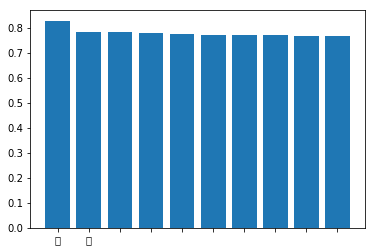

In [38]:
x = [e[0] for e in data]
y = [e[1] for e in data]

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
index = np.arange(len(x))
ax.bar(index, y)
ax.set_xticks(index)
ax.set_xticklabels(['한','글'])
plt.show()

In [44]:
import matplotlib.font_manager as fm
import matplotlib

In [45]:
fm.get_fontconfig_fonts()

[]

In [46]:
font_location = "C:\Windows\Fonts\MALGUN.TTF"
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

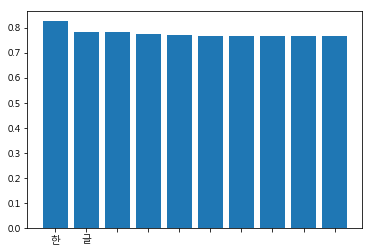

In [47]:
fig, ax = plt.subplots()
index = np.arange(len(x))
ax.bar(index, y)
ax.set_xticks(index)
ax.set_xticklabels(['한','글'])
plt.show()

#### 폰트 패밀리 확인

In [48]:
matplotlib.rcParams["font.family"]

['Malgun Gothic']

####  설정 파일 수정

https://ansuchan.com/matplotlib-with-korean/

matplotlibrc  파일
font.family         : NanumBarunGothicOTF  

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:866: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:867: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


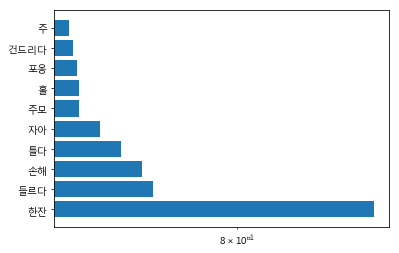

In [52]:
fig, ax = plt.subplots()
index = np.arange(len(x))
ax.barh(index, y)
ax.set_yticks(index)
ax.set_yticklabels(x)
ax.set_xscale("log")
plt.show()

### 위키피디아 한국어 버전을 사전으로 사용해보기

https://dumps.wikimedia.org/kowiki/latest/

kowiki-latest-pages-articles.xml.bz2


루비로 만든 wp2txt 라는 도구 사용.  위키피디아 전체 데이터(XML)를 텍스트로 변환해줌

Docker 환경에서 wp2txt 를 사용하려면 Ruby 2.0 을 설치 해야함

